#  Soluções relativas aos exercícios da Aula 8

## Exercício 2

Implementar o método da potência para encontrar autovalores de matrizes simétricas.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from numpy.linalg import norm

def find_single_eig(matrix):
    v = np.zeros(matrix.shape[0])
    v[0] = 1
    history = []
    for i in range(1000):
        history.append(v)
        v = matrix.dot(v)
        v /= norm(v)
    val = v.dot(matrix.dot(v))
    history.append(v)
    return val, v, history

def find_eig(matrix):
    vecs = []
    vals = []
    mod_M = deepcopy(matrix)
    for i in range(matrix.shape[0]):
        v_temp = find_single_eig(mod_M)
        vals.append(v_temp[0])
        vecs.append(v_temp[1])
        mod_M -= mod_M.dot(np.outer(v_temp[1],v_temp[1].T))
    return vals, np.array(vecs)

np.random.seed(1234)
M = np.random.rand(2,2)
M = M.T.dot(M)

vals, vecs = find_eig(M)
for i in range(vecs.shape[0]):
    print("v"+ str(i) +" =", vecs[i], "λ"+ str(i) +" =", vals[i])

v0 = [ 0.42300581  0.90612697] λ0 = 1.21991124313
v1 = [ 0.90612697 -0.42300581] λ1 = 0.0121814582525


[[ 1.          0.        ]
 [ 0.44228683  0.89687366]
 [ 0.42319934  0.9060366 ]
 [ 0.42300774  0.90612607]
 [ 0.42300583  0.90612696]
 [ 0.42300581  0.90612697]
 [ 0.42300581  0.90612697]
 [ 0.42300581  0.90612697]
 [ 0.42300581  0.90612697]
 [ 0.42300581  0.90612697]]


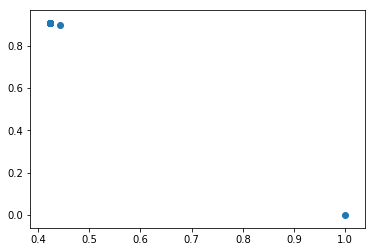

In [2]:
h = find_single_eig(M)
h = np.array(h[2])
print(h[:10])
plt.scatter(h[:,0], h[:,1])
plt.show()

## Exercício 1

Implementar a decomposição SVD de uma matriz.

In [31]:
def svd(matrix):
    valsV, Vt = find_eig(matrix.T.dot(matrix))
    U = matrix.dot(Vt)
    for i in range(U.shape[1]):
        U[:]
    Σ = np.diag(valsV)
    Σ = np.sqrt(Σ[:U.shape[0], :Vt.shape[0]])
    return U, Σ, Vt

np.random.seed(1234)
M2 = np.random.rand(3,2)
decomp = svd(M2)
print("U = ", decomp[0])
print("\n")
print("Σ = ", decomp[1])
print("\n")
print("Vt = ", decomp[2])
print("\n")
print("M2 =",M2)
print("\n")
print("UΣVt=",decomp[0].dot(decomp[1].dot(decomp[2])))

U =  [[ 0.92171286 -0.38787293]
 [ 0.98228756 -0.1873797 ]
 [ 0.8589367   0.51208178]]


Σ =  [[ 1.64361973  0.        ]
 [ 0.          0.27114196]]


Vt =  [[ 0.64189765  0.76679033]
 [ 0.76679033 -0.64189765]]


M2 = [[ 0.19151945  0.62210877]
 [ 0.43772774  0.78535858]
 [ 0.77997581  0.27259261]]


UΣVt= [[ 0.89179763  1.229153  ]
 [ 0.99739045  1.27060109]
 [ 1.01267526  0.9934025 ]]


In [23]:
np.sqrt(np.array([[1,4,9],[16,25,36],[49,64,81]]))

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])